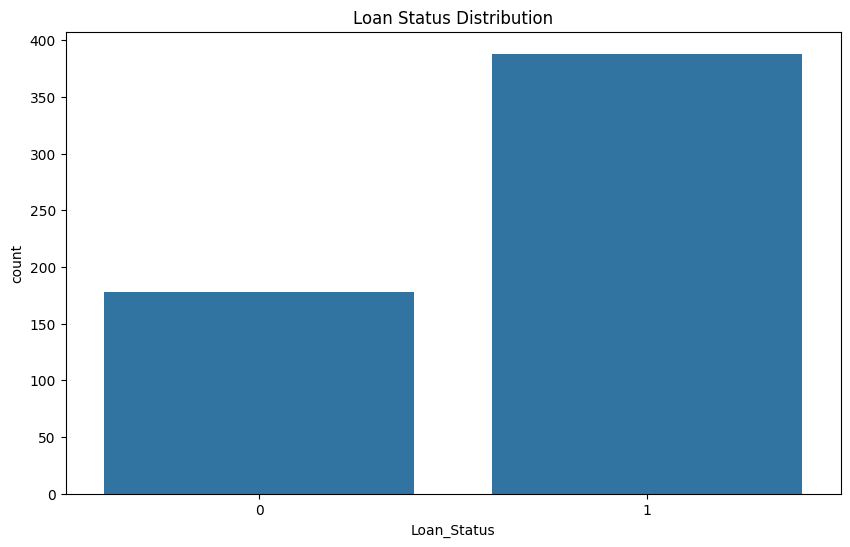

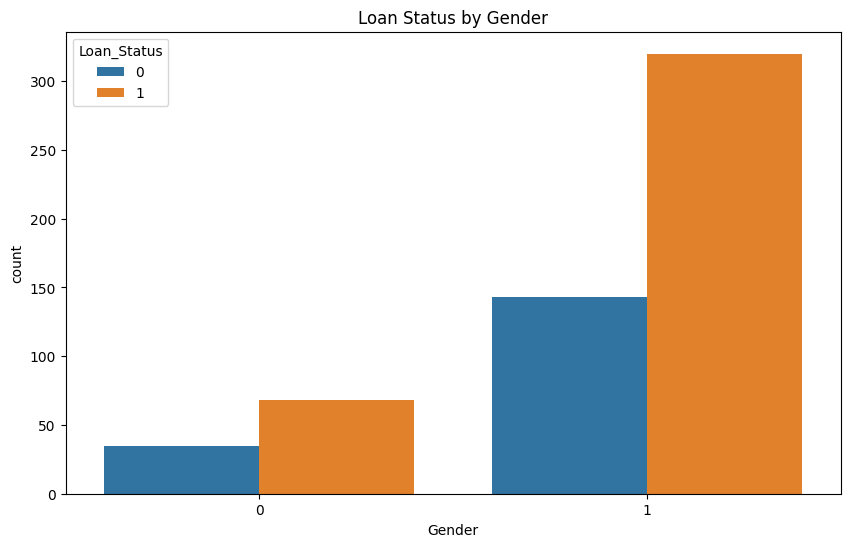

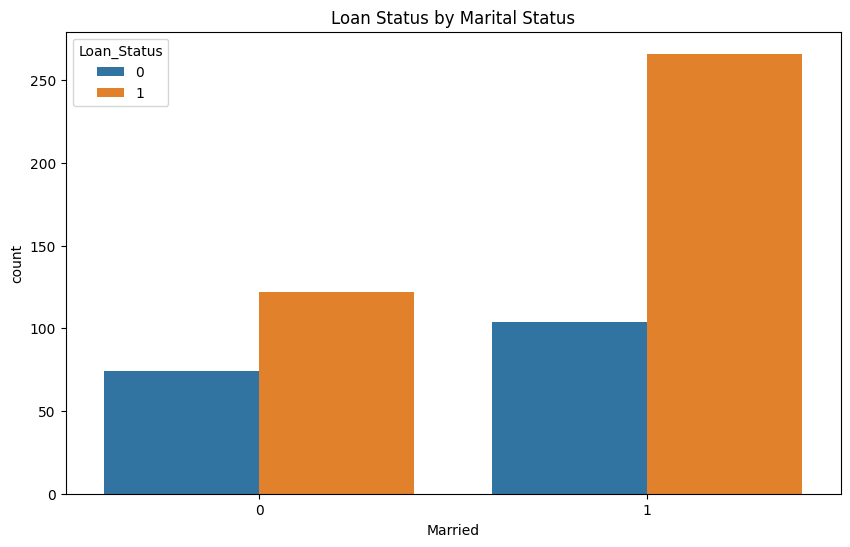

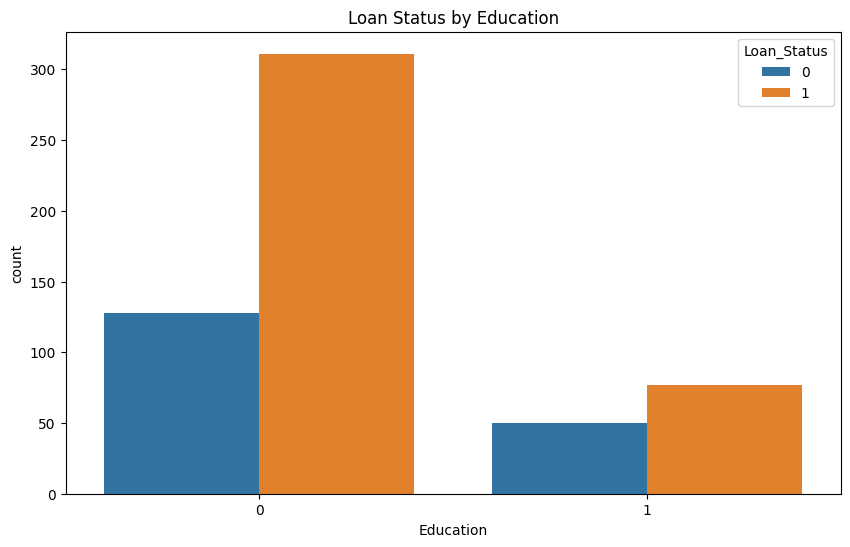

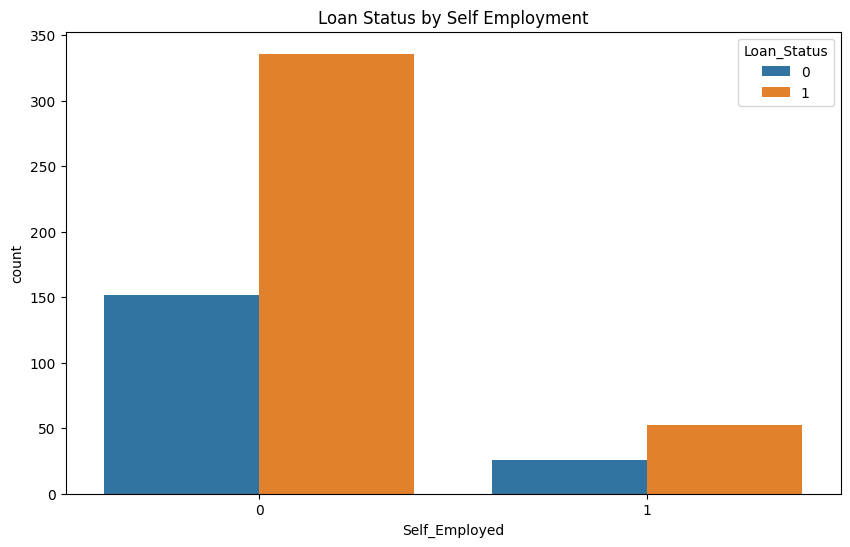

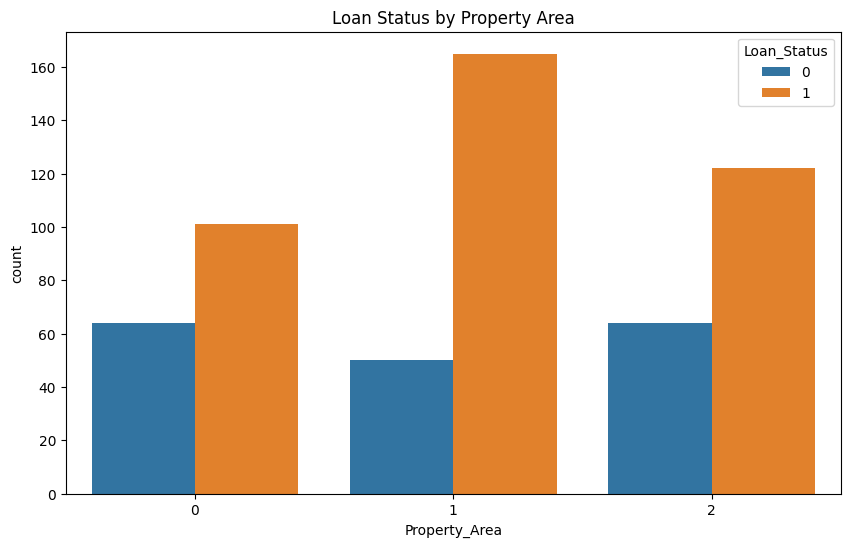

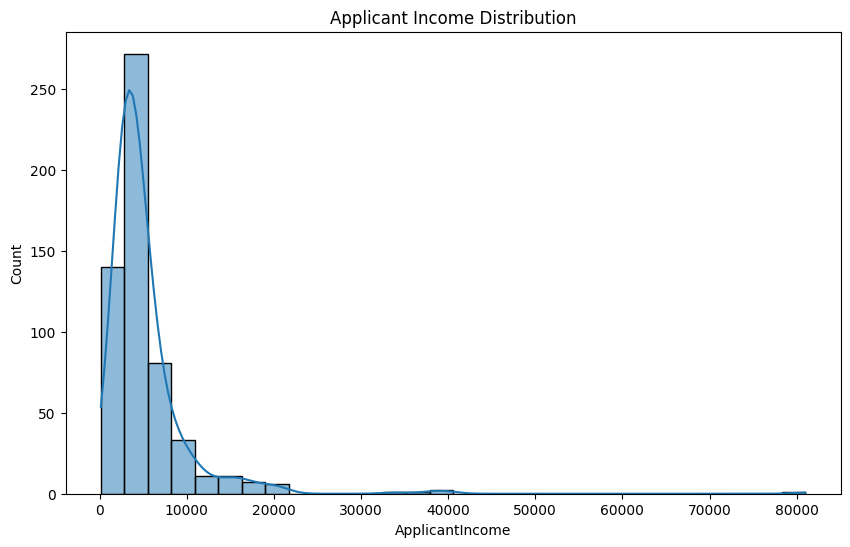

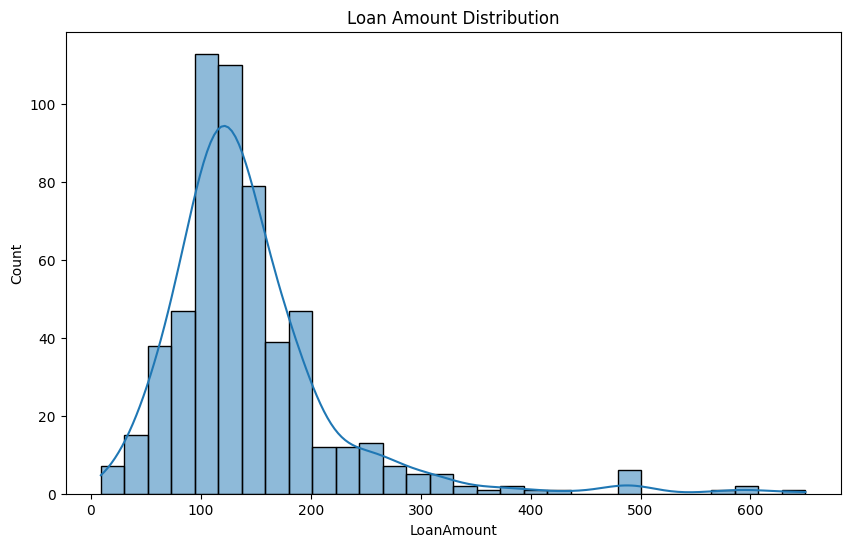

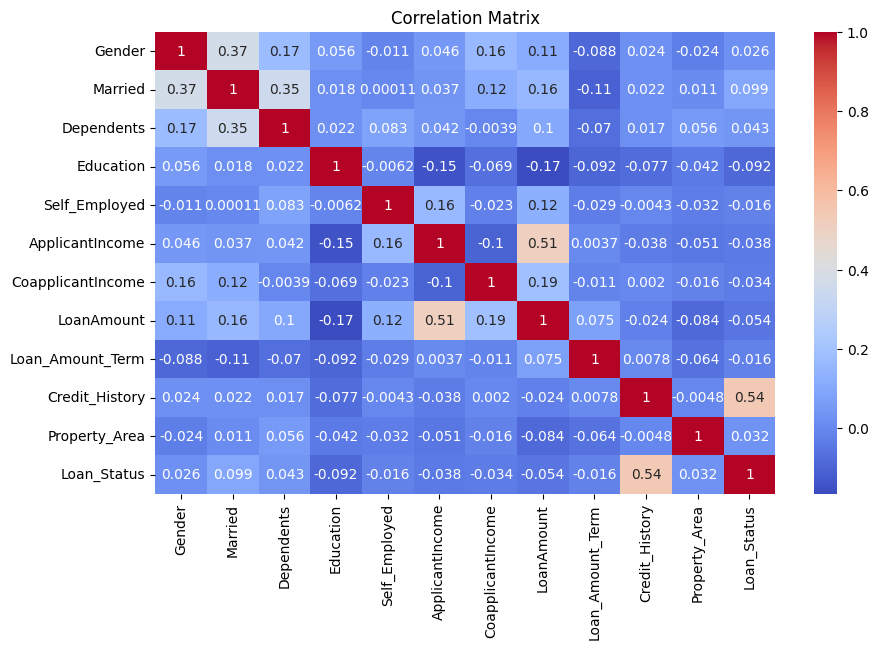

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:58:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.42      0.49        31
           1       0.80      0.89      0.85        83

    accuracy                           0.76       114
   macro avg       0.70      0.66      0.67       114
weighted avg       0.75      0.76      0.75       114

Confusion Matrix:
[[13 18]
 [ 9 74]]
Accuracy Score: 0.7631578947368421
AUC-ROC Score: 0.6554605518849592


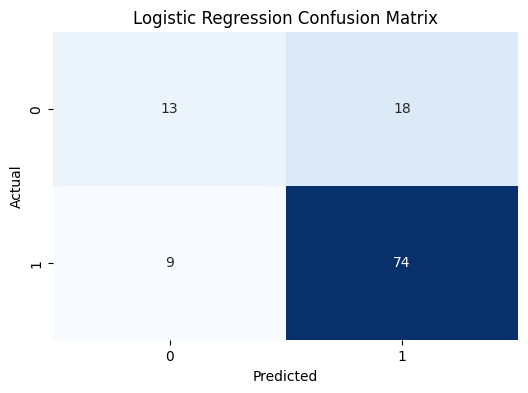

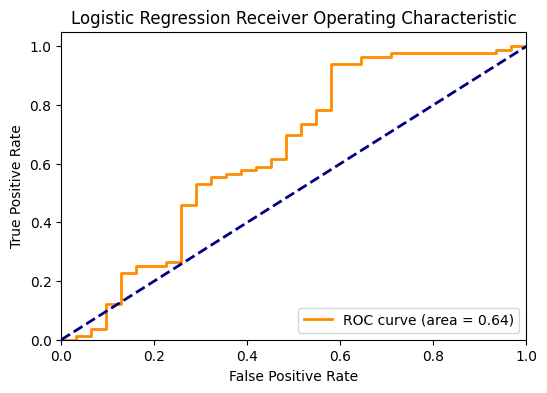


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.55      0.49        31
           1       0.81      0.73      0.77        83

    accuracy                           0.68       114
   macro avg       0.62      0.64      0.63       114
weighted avg       0.71      0.68      0.69       114

Confusion Matrix:
[[17 14]
 [22 61]]
Accuracy Score: 0.6842105263157895
AUC-ROC Score: 0.6416634279051691


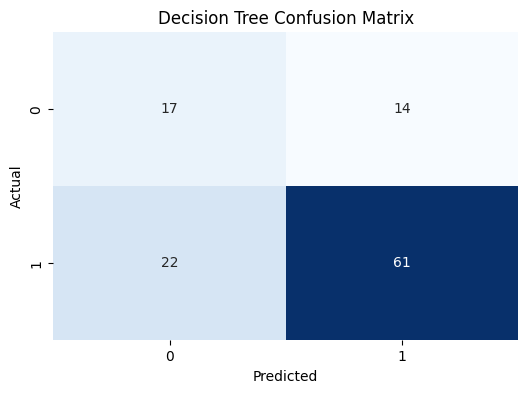

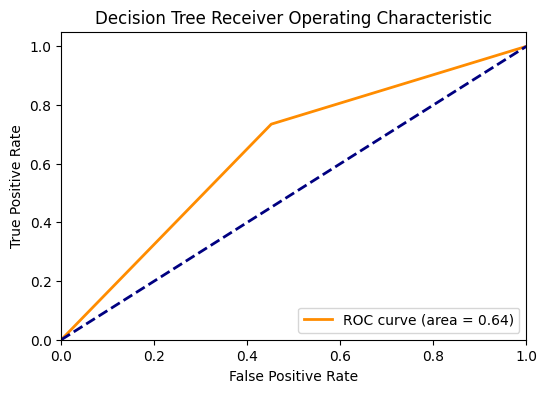


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.42      0.46        31
           1       0.80      0.86      0.83        83

    accuracy                           0.74       114
   macro avg       0.66      0.64      0.64       114
weighted avg       0.72      0.74      0.73       114

Confusion Matrix:
[[13 18]
 [12 71]]
Accuracy Score: 0.7368421052631579
AUC-ROC Score: 0.6373882627283327


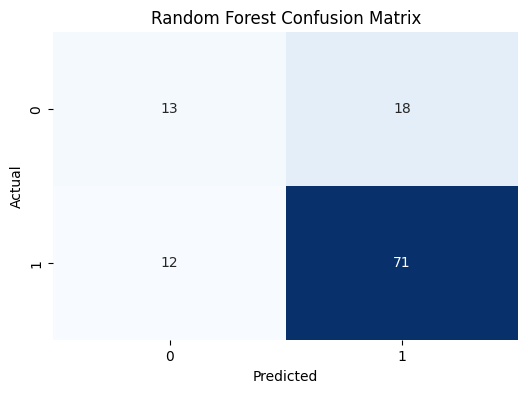

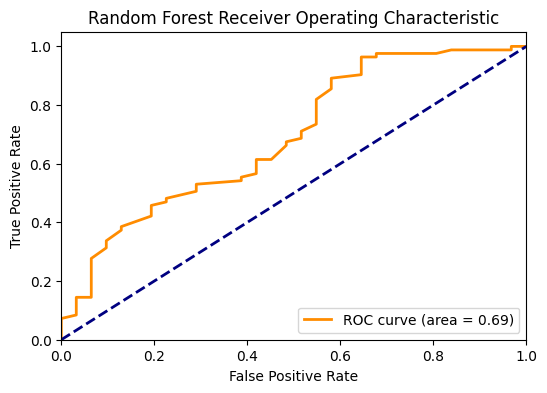


Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.42      0.45        31
           1       0.79      0.83      0.81        83

    accuracy                           0.72       114
   macro avg       0.64      0.63      0.63       114
weighted avg       0.71      0.72      0.71       114

Confusion Matrix:
[[13 18]
 [14 69]]
Accuracy Score: 0.7192982456140351
AUC-ROC Score: 0.6253400699572483


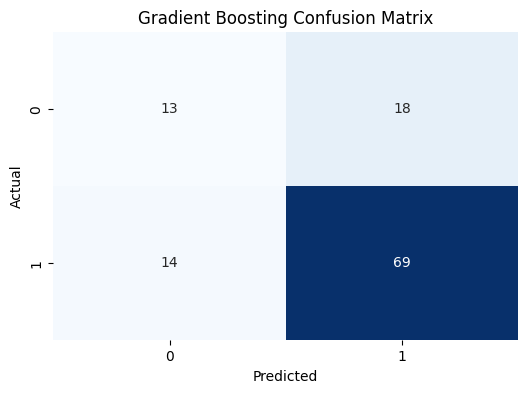

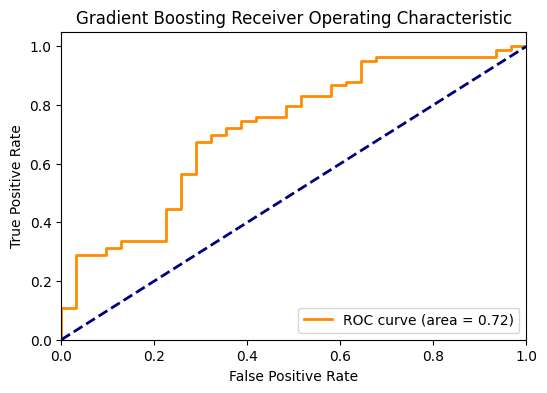


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.58      0.51        31
           1       0.82      0.73      0.78        83

    accuracy                           0.69       114
   macro avg       0.64      0.66      0.64       114
weighted avg       0.72      0.69      0.70       114

Confusion Matrix:
[[18 13]
 [22 61]]
Accuracy Score: 0.6929824561403509
AUC-ROC Score: 0.6577924601632335


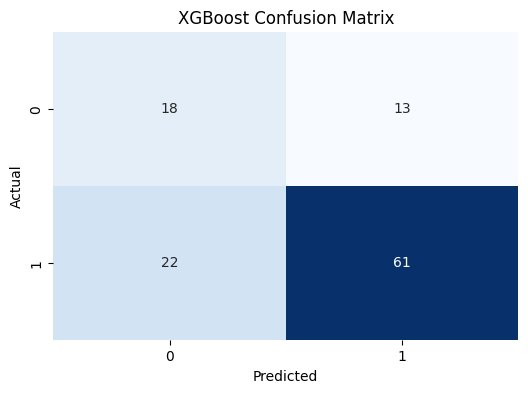

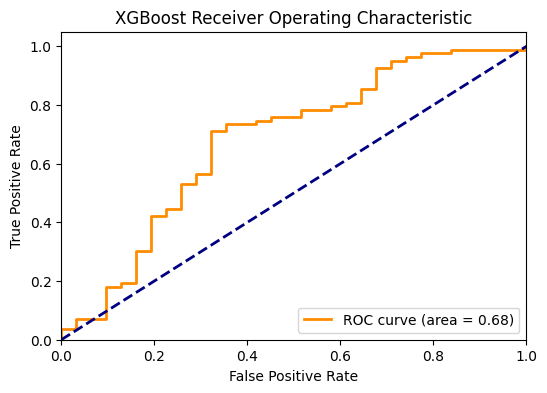

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

# Load the dataset
df = pd.read_csv("/content/loan_data_set.csv")

# Data Preprocessing
df['Dependents'] = pd.to_numeric(df['Dependents'], errors='coerce')
df['Dependents'].fillna(df['Dependents'].mean(), inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mean(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(), inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)
df.dropna(inplace=True)

# Drop the Loan_ID column as it is not needed for correlation matrix
df = df.drop('Loan_ID', axis=1)

# Encode categorical variables
categorical_features = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
for feature in categorical_features:
    le = LabelEncoder()
    df[feature] = le.fit_transform(df[feature])

# EDA Visualizations
plt.figure(figsize=(10, 6))
sns.countplot(x='Loan_Status', data=df)
plt.title('Loan Status Distribution')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', hue='Loan_Status', data=df)
plt.title('Loan Status by Gender')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Married', hue='Loan_Status', data=df)
plt.title('Loan Status by Marital Status')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Education', hue='Loan_Status', data=df)
plt.title('Loan Status by Education')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Self_Employed', hue='Loan_Status', data=df)
plt.title('Loan Status by Self Employment')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Property_Area', hue='Loan_Status', data=df)
plt.title('Loan Status by Property Area')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['ApplicantIncome'], kde=True, bins=30)
plt.title('Applicant Income Distribution')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['LoanAmount'], kde=True, bins=30)
plt.title('Loan Amount Distribution')
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Split the data
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Address class imbalance
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

# Model Training
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Hyperparameter tuning
param_grid = {
    'Random Forest': {
        'n_estimators': [100, 200, 300, 500],
        'max_depth': [None, 10, 20, 30, 50],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'XGBoost': {
        'n_estimators': [100, 200, 300, 500],
        'learning_rate': [0.01, 0.1, 0.2, 0.3],
        'max_depth': [3, 6, 9, 12],
        'subsample': [0.8, 0.9, 1.0]
    }
}

best_models = {}
for model_name in models:
    if model_name in param_grid:
        grid_search = GridSearchCV(models[model_name], param_grid[model_name], cv=3, scoring='accuracy', n_jobs=-1)
        grid_search.fit(X_train, y_train)
        best_models[model_name] = grid_search.best_estimator_
    else:
        models[model_name].fit(X_train, y_train)
        best_models[model_name] = models[model_name]

# Model Evaluation
for model_name in best_models:
    y_pred = best_models[model_name].predict(X_test)
    print(f"\n{model_name} Classification Report:")
    print(classification_report(y_test, y_pred))
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
    print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
    print(f"AUC-ROC Score: {roc_auc_score(y_test, y_pred)}")

    # Plot Confusion Matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Plot ROC Curve
    y_pred_prob = best_models[model_name].predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
